In [11]:
import astropy.io.fits as pf
import pylab as mplot
%pylab inline
import healpy as hp
from astropy import units as u
from astropy.coordinates import SkyCoord
from pylab import cm
mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
from scipy import signal


Populating the interactive namespace from numpy and matplotlib


In [2]:
def M500c_to_R500c(mass, z, cosmo):
    rho_c_z = cosmo.critical_density(z)
    mass_units = mass*u.Msun
    R500c = ((mass_units/(500.*4.*np.pi*rho_c_z/3.))**(1./3.)).to('Mpc')
    return R500c.value

def derivative(R, Y):
    lnR = np.log(R)
    lnY = np.log(Y)
    midR = (R[1:]+R[:-1])/2
    logder = (lnY[1:]-lnY[:-1])/(lnR[1:]-lnR[:-1])
    return midR, logder

def find_cross(SG, bg):
    for i in range(len(SG)):
        if (SG[i]-bg)*(SG[i+1]-bg)<0:
            return i
            break

In [3]:
planck_data = pf.open('HFI_PCCS_SZ-union_R2.08.fits')[1].data

In [4]:
z = planck_data['redshift']
snr = planck_data['snr']
mass = planck_data['MSZ']
ra = planck_data['ra']
dec = planck_data['dec']
mcxc = planck_data['mcxc']
redmapper = planck_data['redmapper']
spt = planck_data['spt']
act = planck_data['act']
wise = planck_data['wise_flag']
cosmo = planck_data['cosmo']
comment = planck_data['comment']

N = 40
z_mask = (z>0)*(z<0.2)
id_snr = np.argsort(snr[z_mask])[-1*N:][::-1]
ra = ra[z_mask][id_snr]
dec = dec[z_mask][id_snr]
z = z[z_mask][id_snr]
snr = snr[z_mask][id_snr]
mass = mass[z_mask][id_snr]
mcxc = mcxc[z_mask][id_snr]
redmapper = redmapper[z_mask][id_snr]
spt = spt[z_mask][id_snr]
act = act[z_mask][id_snr]
wise = wise[z_mask][id_snr]
cosmo = cosmo[z_mask][id_snr]
comment = comment[z_mask][id_snr]

In [5]:
print(spt)

['' '' 'SPT-CLJ0431-6126' '' '' '' '' 'SPT-CLJ2012-5649' '' '' '' ''
 'SPT-CLJ0645-5413' '' '' 'SPT-CLJ2201-5956' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '']


In [6]:
mask = (spt!='')
print(np.arange(len(spt))[mask])

[ 2  7 12 15]


NSIDE = 8192
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


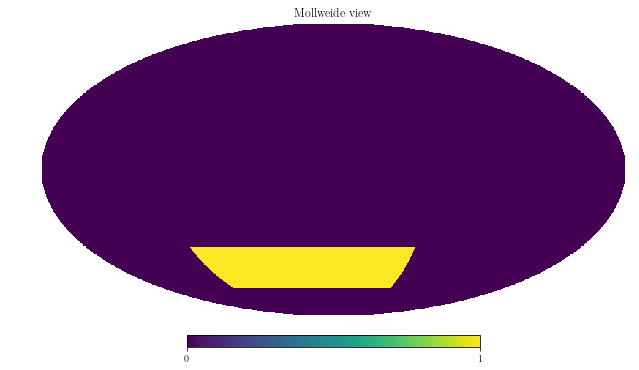

In [7]:
ymap = hp.read_map('/Users/chihwaychang/Work/ClusterProfiles/spt/Planck_SPT_100_353_ymapdec18_ymap_minimum_variance1_cib4_nside_8192.fitsmap.fits')
y_4096 = hp.ud_grade(ymap, 4096)

mask_y = (y_4096!=0)
hp.mollview(mask_y)

theta, phi = hp.pix2ang(4096, np.arange(hp.nside2npix(4096)))
pix = hp.ang2pix(4096, theta, phi)
ra2 = phi/np.pi*180
dec2 = 90. - theta/np.pi*180

ra_y = ra2[mask_y!=0]
dec_y = dec2[mask_y!=0]

(array([2627324., 2627310., 2376574.,       0.,       0.,       0.,
              0.,       0., 1719654., 2627973.]),
 array([  0.        ,  35.99890137,  71.99780273, 107.9967041 ,
        143.99560547, 179.99450684, 215.9934082 , 251.99230957,
        287.99121094, 323.9901123 , 359.98901367]),
 <a list of 10 Patch objects>)

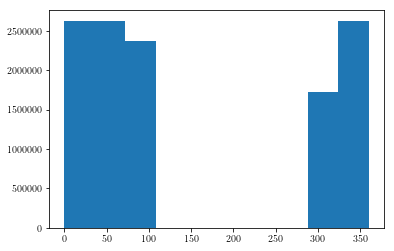

In [8]:
mplot.hist(ra_y)

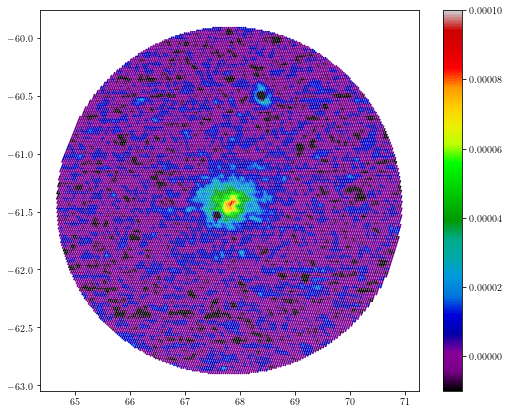

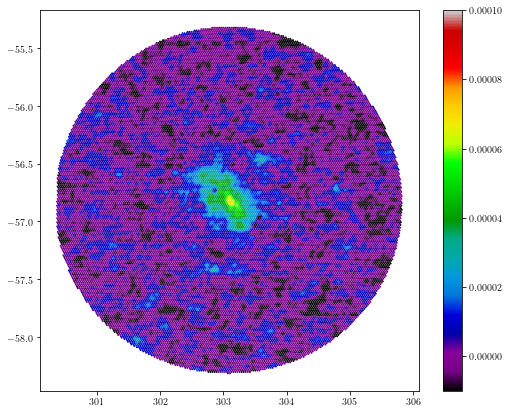

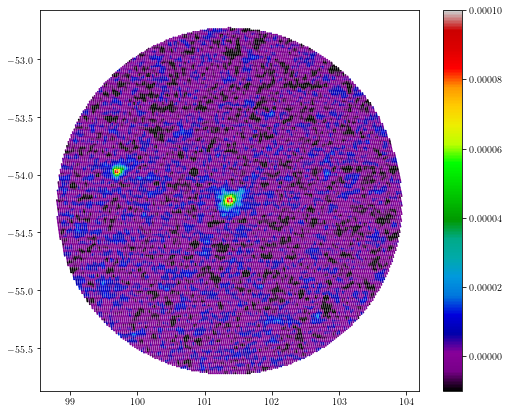

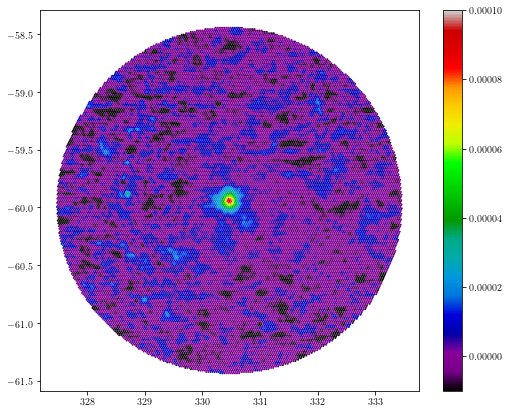

In [9]:
for i in range(4):

    c1 = SkyCoord(ra[mask][i]*u.degree, dec[mask][i]*u.degree, frame='icrs')
    c2 = SkyCoord(ra_y*u.degree, dec_y*u.degree, frame='icrs')
    sep = c1.separation(c2)
    mask_cluster = (sep.degree<1.5)

    mplot.figure(figsize=(8.5,7))
    mplot.scatter(ra_y[mask_cluster], dec_y[mask_cluster], c=y_4096[mask_y][mask_cluster], cmap='nipy_spectral', s=3, marker='.')
    mplot.colorbar()
    mplot.clim(-0.00001,0.0001)
    mplot.show()


R500c in arcmin 15.575543069131667


/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


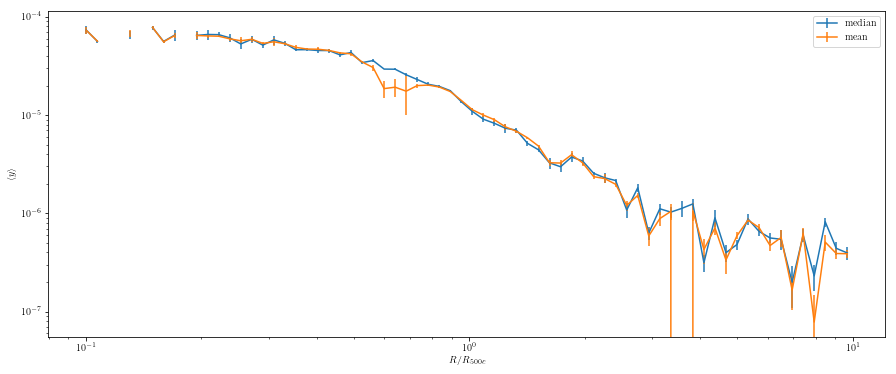

R500c in arcmin 16.776385088677685


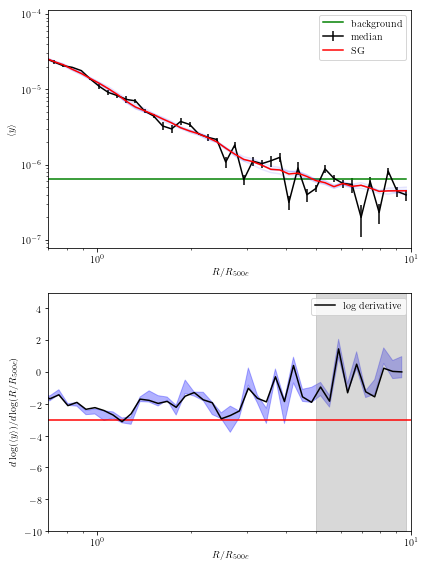

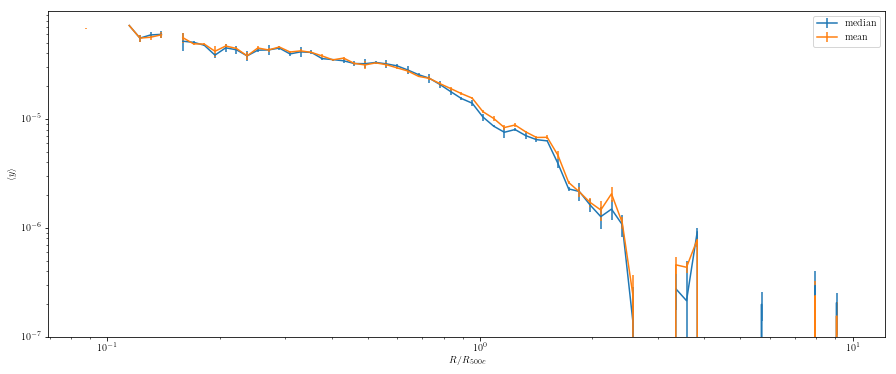

/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


R500c in arcmin 6.456769037537972


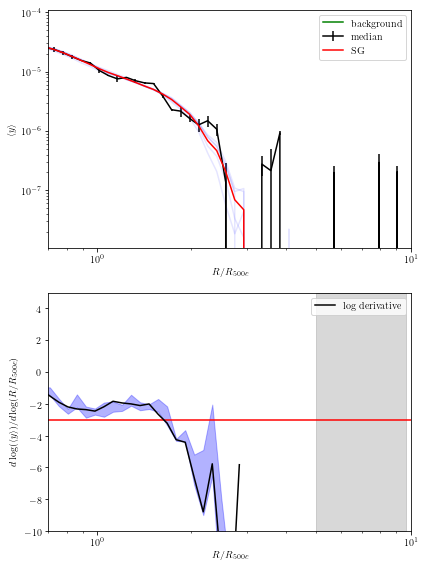

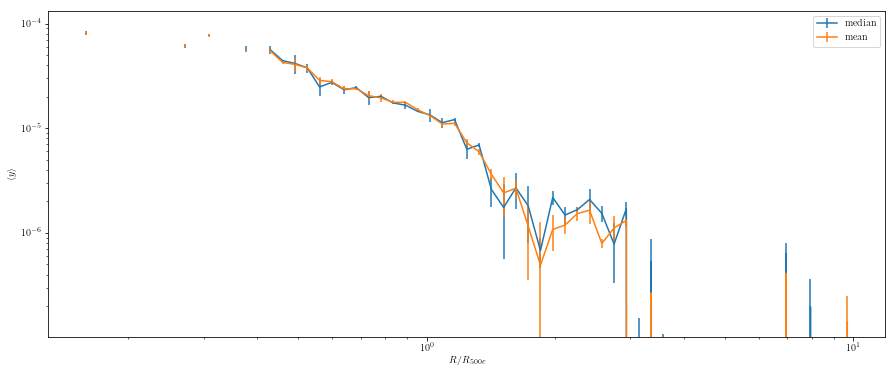

R500c in arcmin 9.2328465465649


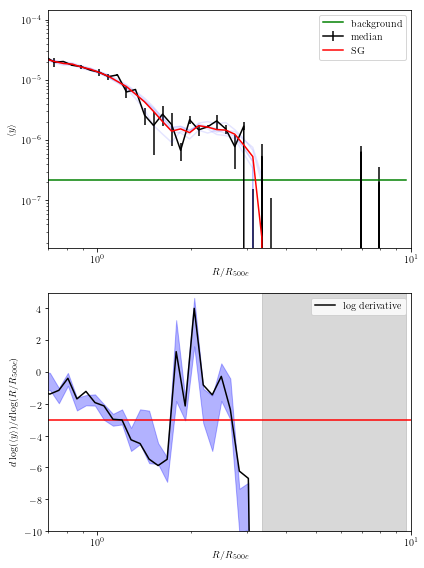

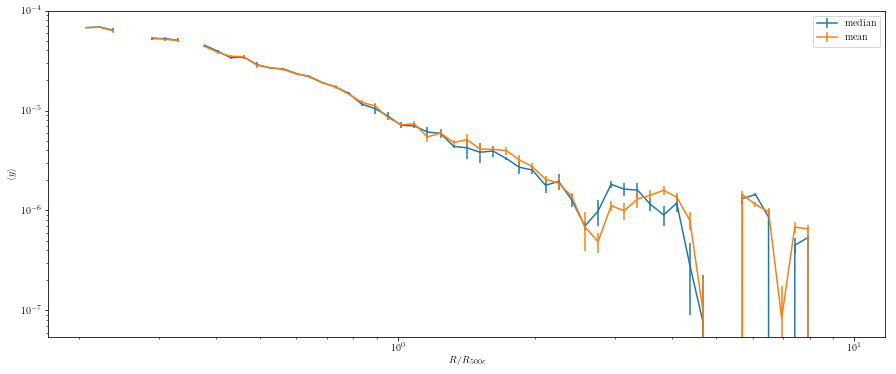

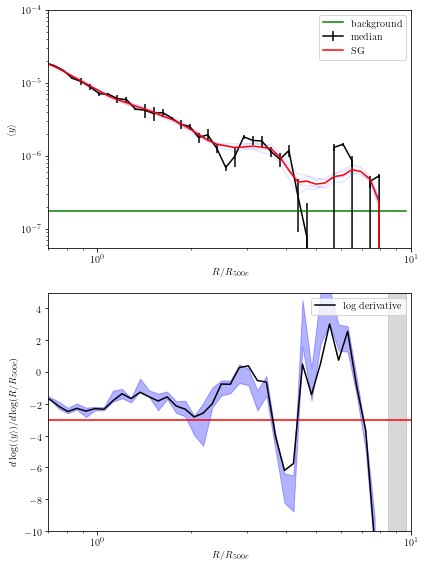

In [13]:
Factor = 1.2225344603067083
Nbs = 5
NRbin = 80
IDS = [2,7,12,15]

for i in range(4):

    R500c = (1+z[mask][i])*M500c_to_R500c(mass[mask][i]*10**14/Factor**3, z[mask][i], cosmo)/cosmo.comoving_distance(z[mask][i]).value /np.pi*180.*60
    print('R500c in arcmin', R500c)
    
    c1 = SkyCoord(ra[mask][i]*u.degree, dec[mask][i]*u.degree, frame='icrs')
    c2 = SkyCoord(ra_y*u.degree, dec_y*u.degree, frame='icrs')
    sep = c1.separation(c2)
    mask_cluster = (sep.degree<5)

    ids = np.arange(len(y_4096[mask_y][mask_cluster]))
    Npix = len(y_4096[mask_y][mask_cluster])
    bg_mask = (sep.value[mask_cluster]>3)

    bin_edge = np.logspace(np.log10(0.05), np.log10(10.0), num=NRbin+1)
    bin_min = bin_edge[:-1]
    bin_max = bin_edge[1:]
    
    Y1_boot = []
    Y1_boot_err = []
    Y2_boot = []
    Y2_boot_err = []

    for j in range(Nbs):
        ids_new = np.random.choice(ids, size=Npix, replace=True)

        c2_new = SkyCoord(ra_y[mask_cluster][ids_new]*u.degree, dec_y[mask_cluster][ids_new]*u.degree, frame='icrs')
        sep_new = c1.separation(c2_new)

        bg_mask_new = bg_mask[ids_new]
        bg = np.median(y_4096[mask_y][mask_cluster][bg_mask_new])

        Y1 = []
        Y2 = []
        for k in range(NRbin):
            R_over_R500 = np.array(sep_new.degree)*60.0/R500c
            mask2 = (R_over_R500 >= bin_min[k])*(R_over_R500 < bin_max[k])
            Y1.append(np.median(y_4096[mask_y][mask_cluster][ids_new][mask2]))
            Y2.append(np.mean(y_4096[mask_y][mask_cluster][ids_new][mask2]))

        Y1 = np.array(Y1)
        Y1_boot.append(Y1)
        Y2 = np.array(Y2)
        Y2_boot.append(Y2)

    Y1_boot = np.array(Y1_boot)
    Y2_boot = np.array(Y2_boot)

    Y1_err = np.std(Y1_boot, axis=0)
    Y1_mean = np.mean(Y1_boot, axis=0)
    Y2_err = np.std(Y2_boot, axis=0)
    Y2_mean = np.mean(Y2_boot, axis=0)

    cov_boot1 = np.cov(Y1_boot.T)
    cov_boot2 = np.cov(Y2_boot.T)

    DD = (bin_min+bin_max)/2

    
    mplot.figure(figsize=(15,6))
    mplot.errorbar(DD, Y1_mean, yerr=Y1_err, label='median')
    mplot.errorbar(DD, Y2_mean, yerr=Y2_err, label='mean')
    mplot.xlabel('$R/R_{500c}$')
    mplot.ylabel('$\langle y \\rangle$')
    mplot.yscale('log')
    mplot.xscale('log')
    mplot.legend()
    mplot.show()
    
    # SG smoothing including error bars
    SG = signal.savgol_filter(Y1_mean, 13, 2, mode='nearest')

    SG_boot = []
    for j in range(Nbs):
        SG_boot.append(signal.savgol_filter(Y1_boot[j], 13, 2, mode='nearest'))

    mplot.figure(figsize=(6,8))
    mplot.subplot(211)
    for j in range(Nbs):
        mplot.errorbar(DD, SG_boot[j], c='b', alpha=0.1)

    mplot.errorbar(DD, Y1_mean, yerr=Y1_err, color='k', label='median')
    mplot.errorbar(DD, SG, label='SG', color='r')
    mplot.plot(DD, SG*0 + bg, label='background', color='g')
    mplot.xlabel('$R/R_{500c}$')
    mplot.ylabel('$\langle y \\rangle$')

    Rcross = DD[find_cross(SG, bg)]
    
    mplot.yscale('log')
    mplot.xscale('log')
    mplot.xlim(0.7,10)
    mplot.legend()

    midR, logder = derivative(DD, SG)
    mplot.subplot(212)
    mplot.errorbar(midR, logder, label='log derivative', color='k')

    SG_err = []
    for j in range(Nbs):
        midR, logder = derivative(DD, SG_boot[j])
        SG_err.append(derivative(DD, SG_boot[j])[1])
    SG_err = np.array(SG_err)
    mplot.fill_between(midR, logder-np.std(SG_err, axis=0), logder+np.std(SG_err, axis=0), alpha=0.3, color='b')
    mplot.fill_between(DD[DD>Rcross], DD[DD>Rcross]*0.0-10, DD[DD>Rcross]*0.0+5, color='grey', alpha=0.3)
    mplot.plot([0.7,10],[-3,-3], color='r')
    mplot.xscale('log')
    mplot.xlabel('$R/R_{500c}$')
    mplot.ylabel('$d \log(\langle y \\rangle)/d \log (R/R_{500c})$')

    mplot.xlim(0.7,10)
    mplot.ylim(-10,5)
    mplot.legend()
    mplot.tight_layout() 
  
 
    np.savez('SPT_cluster_bootstrap_scaled'+'_'+str(IDS[i])+'.npz', ra=ra[mask][i], dec=dec[mask][i], 
             z=z[mask][i], mass=mass[mask][i], snr=snr[mask][i], R500c=R500c, 
             R_over_R500c=DD, median_y=Y1_mean, mean_y=Y2_mean, bg=bg, cov_median=cov_boot1, cov_mean=cov_boot2, 
             SG=SG, Rcross=Rcross, midR=midR, logder=logder, logder_err=np.std(SG_err, axis=0))
